# <center>Analyzing Football Clubs in the U.K.</center>
## <center>by Feng Gu</center>

## Introduction
### The objective of this data science project is evaluating the performance of football clubs in the U.K. from $2010$ to $2019$ and hopefully getting insights on the general trends of British and Wales football. This tutorial will try to discover patterns hiding in plain sight. The football clubs are selected from the Premier League, the EFL League One, etc. The football data used in this tutorial can be found [here](https://github.com/footballcsv/england), under the 2010s folder.
## Required Libraries
### pandas (data manipulation) <br /> Regular Expression (processing data) <br /> matplotlib (plotting graphs) <br /> scikit-learn (machine learning) <br /> numpy (calculation)

In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Data collection
### This is the process where we gather the information from GitHub and put it in a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). A DataFrame is a $2$-dimentional table in which we store our data. The DataFrame allows us to extract and filter data whenever we need. The [GitHub repository](https://github.com/footballcsv/england) provides an archive file consisting of csv tables. 
### For convenience purposes, I renamed the csv tables (to '10.csv', '11.csv', etc.) after unzipping the archived file. We use the $read_csv()$ function in pandas to read the csv tables and put them in a list sequentially. We print out the content of the first file to give you a general idea. Each line represents a football match, containing the competing teams, score, date, and round, as you can see below.

In [2]:
frames = []
list = ['10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv']
for file in list:
    data = pd.read_csv(file, sep=',')
    frames.append(data)
    if file == '10.csv':
        print(data)  

      Round             Date                      Team 1   FT  \
0         1  Sat Aug 14 2010         Bolton Wanderers FC  0-0   
1         1  Sat Aug 14 2010           Wigan Athletic FC  0-4   
2         1  Sat Aug 14 2010              Aston Villa FC  3-0   
3         1  Sat Aug 14 2010  Wolverhampton Wanderers FC  2-1   
4         1  Sat Aug 14 2010              Sunderland AFC  2-2   
...     ...              ...                         ...  ...   
2031     46   Sat May 7 2011           Leicester City FC  4-2   
2032     46   Sat May 7 2011           Crystal Palace FC  0-3   
2033     46   Sat May 7 2011                  Burnley FC  1-1   
2034     46   Sat May 7 2011             Bristol City FC  3-0   
2035     46   Sat May 7 2011                 Barnsley FC  1-0   

                    Team 2  
0                Fulham FC  
1             Blackpool FC  
2       West Ham United FC  
3            Stoke City FC  
4       Birmingham City FC  
...                    ...  
2031       Ipswi

### Next, we need to combine data from each year. We can do so by using the $concat()$ function in pandas. Now, we have a DataFrame containing all the information needed to do an analysis.

In [3]:
data = pd.concat(frames, ignore_index=True)
data

,Round,Date,Team 1,FT,Team 2
0,1,Sat Aug 14 2010,Bolton Wanderers FC,0-0,Fulham FC
1,1,Sat Aug 14 2010,Wigan Athletic FC,0-4,Blackpool FC
2,1,Sat Aug 14 2010,Aston Villa FC,3-0,West Ham United FC
3,1,Sat Aug 14 2010,Wolverhampton Wanderers FC,2-1,Stoke City FC
4,1,Sat Aug 14 2010,Sunderland AFC,2-2,Birmingham City FC
...,...,...,...,...,...
18405,46,Sat Apr 25 2020,Hartlepool United FC,NaN,Torquay United FC
18406,46,Sat Apr 25 2020,Maidenhead United FC,NaN,Sutton United FC
18407,46,Sat Apr 25 2020,Notts County FC,NaN,Yeovil Town FC
18408,46,Sat Apr 25 2020,Solihull Moors FC,NaN,FC Halifax Town


## Data Processing
### There are a few things we need to do to tidy the data. <br /> 1. We notived that there are missing values in some rows. We need to remove them to improve accuracy. <br /> 2. We need to split the score from the $FT$ column and find out the winning team. We can do so using regular expression <br /> 3. We can also ignore the round, month, and day because they are relatively insignificant in our quantitative analysis.

In [4]:
# process data
data = data.dropna() # remove the rows with missing values
data['Team 1 goals'] = 0 # creating new columns to record the new information obtained
data['Team 2 goals'] = 0
data['winning team'] = ''
# iterate by rows
for idx, row in data.iterrows():
    date_regex = re.compile(r'(\d{4})') # the regular expression to find the year in the 'Date' column
    ft_regex = re.compile(r'(\d)') # the regular expression to find the scores in the 'FT' column
    s1, s2 = re.findall(ft_regex, row['FT']) # s1 represents the score for team 1, s2 for team 2
    year = re.findall(date_regex, row['Date']) # find the year in the 'Date' column
    # putting the values in the new columns
    data.at[idx, 'Team 1 goals'] = s1 
    data.at[idx, 'Team 2 goals'] = s2
    # remove month and day from date
    data.at[idx, 'Date'] = int(year[0])
    # find the winning team
    if s1 > s2:
        data.at[idx, 'winning team'] = row['Team 1']
    elif s2 > s1:
        data.at[idx, 'winning team'] = row['Team 2']
    else:
        data.at[idx, 'winning team'] = 'draw'
# remove the 'Round' and 'FT' since they are no longer useful
data = data.drop(columns=['Round', 'FT'])  
data

,Date,Team 1,Team 2,Team 1 goals,Team 2 goals,winning team
0,2010,Bolton Wanderers FC,Fulham FC,0,0,draw
1,2010,Wigan Athletic FC,Blackpool FC,0,4,Blackpool FC
2,2010,Aston Villa FC,West Ham United FC,3,0,Aston Villa FC
3,2010,Wolverhampton Wanderers FC,Stoke City FC,2,1,Wolverhampton Wanderers FC
4,2010,Sunderland AFC,Birmingham City FC,2,2,draw
...,...,...,...,...,...,...
18306,2020,Dover Athletic FC,Chesterfield FC,1,1,draw
18307,2020,Sutton United FC,Hartlepool United FC,1,1,draw
18309,2020,Notts County FC,Eastleigh FC,4,0,Notts County FC
18310,2020,Maidenhead United FC,Stockport County FC,1,2,Stockport County FC


### Now we have a better DataFrame. The next step is to format the data to gain information about each football club. Thus, we can create a new DataFrame with respect to the clubs instead of the football matches. We want to know how many goals they made, how many games they win, etc. from $2010$ to $2019$. To obtain a list of the clubs, we can just look at the $Team\:1$ and $Team\:2$ columns from our previous DataFrame. Notice that we use the $drop\_duplicates()$ function so that no club is listed multiple times. We have now created a template to record team standing information.

In [5]:
# creates a stat table for teams
# create a list containing all the teams
teams1 = data['Team 1'].drop_duplicates().tolist()
teams2 = data['Team 2'].drop_duplicates().tolist()
teams1.extend(x for x in teams2 if x not in teams1)

# creates a new dataframe with the following columns
teams_db = pd.DataFrame(columns=['team', 'games', 'wins', 'losses', 'winrate', 'goals'])
teams_db['team'] = teams1 # initialize the teams
teams_db = teams_db.set_index('team') # set the teams as the index
# initializing all the numerical values
teams_db['games'] = 0
teams_db['wins'] = 0
teams_db['losses'] = 0
teams_db['draws'] = 0
teams_db['winrate'] = 0.0
teams_db['goals'] = 0
teams_db['opponent_goals'] = 0
teams_db['goal_ratio'] = 0.0
teams_db

,games,wins,losses,winrate,goals,draws,opponent_goals,goal_ratio
team,,,,,,,,
Bolton Wanderers FC,0,0,0,0.0,0,0,0,0.0
Wigan Athletic FC,0,0,0,0.0,0,0,0,0.0
Aston Villa FC,0,0,0,0.0,0,0,0,0.0
Wolverhampton Wanderers FC,0,0,0,0.0,0,0,0,0.0
Sunderland AFC,0,0,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
Maldon & Tiptree FC,0,0,0,0.0,0,0,0,0.0
Kingstonian FC,0,0,0,0.0,0,0,0,0.0
Boston United FC,0,0,0,0.0,0,0,0,0.0


### For every year between 2010 and 2019 (inclusive), we record the team standing and calculate the $win\:rate$ and $goal\:ratio$. Note that we dropped rows with $games = 0$  or missing values ($NaN$). We also need to calculate the $win\:rate$ and the $goal\_ratio$ for each team as the match data is recorded. We can use the following formula to calculate the $win\:rate$: <br /> $winrate = \frac{wins}{games}$ (the greater the better), and the $goal\_ratio$ using: <br /> $goal\:ratio = \frac{goals}{opponent\:goals}$ (the greater the better) <br /> 

In [6]:
team_standing_by_year = []
for year in range(2010,2020): # iterate over year
    temp = teams_db.copy() # create a copy of the empty table
    for idx, row in data.iterrows():
        if row['Date'] == year: # check the year value is correct
            team1 = row['Team 1']
            team2 = row['Team 2']
            wt = row['winning team']
            # increment the corresponding game and goal value in the new dataframe
            temp.loc[[team1, team2], ['games']] += 1
            temp.loc[[team1], ['goals']] += row['Team 1 goals']
            temp.loc[[team1], ['opponent_goals']] += row['Team 2 goals']
            temp.loc[[team2], ['goals']] += row['Team 2 goals']
            temp.loc[[team2], ['opponent_goals']] += row['Team 1 goals']
            # check for the winning and losing team and update the value
            if wt == 'draw':
                temp.loc[[team1, team2], ['draws']] += 1
            elif wt == team1:
                temp.loc[[team1], ['wins']] += 1
                temp.loc[[team2], ['losses']] += 1
            else:
                temp.loc[[team2], ['wins']] += 1
                temp.loc[[team1], ['losses']] += 1
    temp = temp.dropna() # drop teams with missing values
    temp_filtered = temp[temp['games'] > 0]  # drop teams with 0 games
    team_standing_by_year.append(temp_filtered) # put the dataframe in a list
    
for standing in team_standing_by_year:
    for idx,row in standing.iterrows():
        if row['games'] > 0:
            wr = row['wins'] / row['games'] # calculating win rate
            standing.at[idx, 'winrate'] = wr
        if row['opponent_goals'] > 0:
            gr = row['goals'] / row['opponent_goals'] # calculating goal ratio
            standing.at[idx, 'goal_ratio'] = gr

### team_standing_by_year now has the data separated by $year$. We create a new DataFrame containing data from $2010$ to $2019$. That is, adding all the data together.

In [7]:
for idx, row in data.iterrows():
    # getting teams that are playing and winning
    team1 = row['Team 1']
    team2 = row['Team 2']
    wt = row['winning team']
    # increment the corresponding game and goal value in the new dataframe
    teams_db.loc[[team1, team2], ['games']] += 1
    teams_db.loc[[team1], ['goals']] += row['Team 1 goals']
    teams_db.loc[[team1], ['opponent_goals']] += row['Team 2 goals']
    teams_db.loc[[team2], ['goals']] += row['Team 2 goals']
    teams_db.loc[[team2], ['opponent_goals']] += row['Team 1 goals']
    # check for the winning and losing team and update the value
    if wt == 'draw':
        teams_db.loc[[team1, team2], ['draws']] += 1
    elif wt == team1:
        teams_db.loc[[team1], ['wins']] += 1
        teams_db.loc[[team2], ['losses']] += 1
    else:
        teams_db.loc[[team2], ['wins']] += 1
        teams_db.loc[[team1], ['losses']] += 1

In [8]:
# calculate winrate
for idx,row in teams_db.iterrows():
    wr = row['wins'] / row['games']
    gr = row['goals'] / row['opponent_goals']
    teams_db.at[idx, 'winrate'] = wr
    teams_db.at[idx, 'goal_ratio'] = gr
teams_db    

,games,wins,losses,winrate,goals,draws,opponent_goals,goal_ratio
team,,,,,,,,
Bolton Wanderers FC,342,86,163,0.251462,383,93,550,0.696364
Wigan Athletic FC,341,109,137,0.319648,407,95,473,0.860465
Aston Villa FC,314,81,145,0.257962,353,88,508,0.694882
Wolverhampton Wanderers FC,344,132,122,0.383721,463,90,457,1.013129
Sunderland AFC,353,103,139,0.291785,412,111,483,0.853002
...,...,...,...,...,...,...,...,...
Maldon & Tiptree FC,2,1,1,0.500000,2,0,2,1.000000
Kingstonian FC,2,1,1,0.500000,4,0,2,2.000000
Boston United FC,3,1,1,0.333333,5,1,3,1.666667


### Now, we noticed that there are teams with inadequate data. Let's filter out teams with $games < 30$ to maintain data integrity. Data processing is now finished.

In [9]:
# filter teams using games
team_filtered = teams_db[teams_db['games'] >= 30] 
team_filtered

,games,wins,losses,winrate,goals,draws,opponent_goals,goal_ratio
team,,,,,,,,
Bolton Wanderers FC,342,86,163,0.251462,383,93,550,0.696364
Wigan Athletic FC,341,109,137,0.319648,407,95,473,0.860465
Aston Villa FC,314,81,145,0.257962,353,88,508,0.694882
Wolverhampton Wanderers FC,344,132,122,0.383721,463,90,457,1.013129
Sunderland AFC,353,103,139,0.291785,412,111,483,0.853002
...,...,...,...,...,...,...,...,...
Dover Athletic FC,87,32,34,0.367816,108,21,121,0.892562
Eastleigh FC,87,34,30,0.390805,112,23,124,0.903226
Harrogate Town AFC,84,40,24,0.476190,140,20,103,1.359223


## Exploratory Analysis and Data Visualization
### Remeber that our objective includes finding patterns from the data. To begin with, we can try to find the relationship between $win\:rate$ and $goal\:ratio$. We can rearrange the rows by their $win\:rate$ in the descending order using the $sort\_values()$ function:

In [10]:
team_filtered.sort_values('winrate', ascending=False)

,games,wins,losses,winrate,goals,draws,opponent_goals,goal_ratio
team,,,,,,,,
Manchester City FC,391,265,65,0.677749,895,61,342,2.616959
Chelsea FC,388,223,83,0.574742,706,82,398,1.773869
Manchester United FC,390,223,76,0.571795,701,91,382,1.835079
Liverpool FC,385,214,82,0.555844,734,89,416,1.764423
Arsenal FC,387,210,89,0.542636,715,88,441,1.621315
...,...,...,...,...,...,...,...,...
Hereford FC (2014-),92,22,39,0.239130,100,31,136,0.735294
Macclesfield Town FC,177,39,83,0.220339,179,55,264,0.678030
Maidstone United FC,50,11,32,0.220000,41,7,88,0.465909


### And by $goal\:ratio$:

In [11]:
team_filtered.sort_values('goal_ratio', ascending=False)

,games,wins,losses,winrate,goals,draws,opponent_goals,goal_ratio
team,,,,,,,,
Manchester City FC,391,265,65,0.677749,895,61,342,2.616959
Manchester United FC,390,223,76,0.571795,701,91,382,1.835079
Chelsea FC,388,223,83,0.574742,706,82,398,1.773869
Liverpool FC,385,214,82,0.555844,734,89,416,1.764423
Arsenal FC,387,210,89,0.542636,715,88,441,1.621315
...,...,...,...,...,...,...,...,...
Stockport County FC,87,26,37,0.298851,102,24,152,0.671053
Maidenhead United FC,86,28,47,0.325581,90,11,135,0.666667
Braintree Town FC,46,11,27,0.239130,48,8,78,0.615385


### It seems that the $goal\:ratio$ is associated with the $win\:rate$: teams that appear in the first few rows in the former DataFrame also appear in the latter DataFrame. We hypothesize that the $goal\:ratio$ is associated with $win\:rate$. In the next step, we want to see the performance of each team in the top $5$ using matplotlib. For each team, we calculate its winrate in each year respectively using the aforementioned formula.

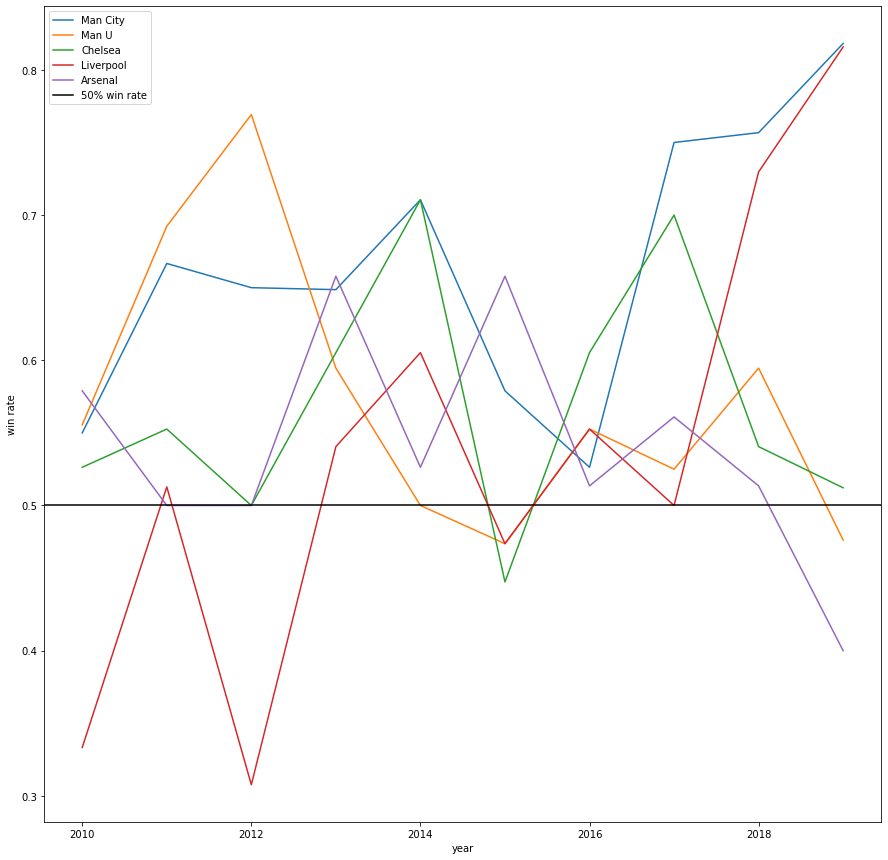

In [12]:
fig= plt.figure(figsize=(15,15))
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
mc = []
mu = []
cfc = []
lfc = []
afc = []
for standing in team_standing_by_year:
    mc.append(standing.loc['Manchester City FC', 'winrate'])
    mu.append(standing.loc['Manchester United FC', 'winrate'])
    cfc.append(standing.loc['Chelsea FC', 'winrate'])
    lfc.append(standing.loc['Liverpool FC', 'winrate'])
    afc.append(standing.loc['Arsenal FC', 'winrate'])
    
plt.plot(years, mc, label='Man City')
plt.plot(years, mu, label ='Man U')
plt.plot(years, cfc, label='Chelsea')
plt.plot(years, lfc, label='Liverpool')
plt.plot(years, afc, label='Arsenal')
plt.axhline(y=0.5, color='black', linestyle='-', label = '50% win rate')
plt.legend()
plt.xlabel('year')
plt.ylabel('win rate')
plt.show()

### Obviously, the top teams are performing exceptionally well (given the $50\%$ winrate line). Here, we can also plot the trend of standard deviation for win rate and goal ratio. We have to make sure there are no missing values so that the $std()$ function from numpy would work.

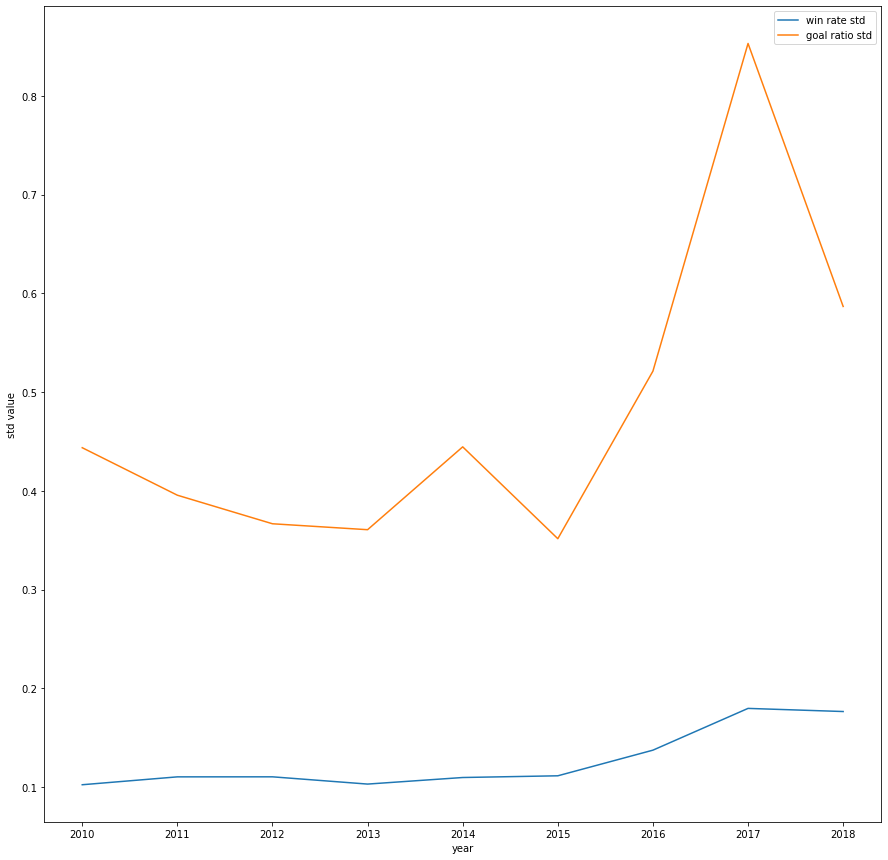

In [13]:
wr_std = []
gr_std = []
for standing in team_standing_by_year[:-1]:
    wrs = np.array(standing['winrate']) # getting the winrates
    wrs = wrs[~np.isnan(wrs)] # remove missing value
    wr_std.append(np.std(wrs)) # add to the list
    
    grs = np.array(standing['goal_ratio'])
    grs = grs[~np.isnan(grs)]
    gr_std.append(np.std(grs))

fig= plt.figure(figsize=(15,15))
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
plt.plot(years, wr_std, label='win rate std')
plt.plot(years, gr_std, label='goal ratio std')
plt.legend()
plt.xlabel('year')
plt.ylabel('std value')
plt.show()

### The standard deviation for win rate maintains the same level over the decade. However, the standard deviation for goal ratio increased dramatically over the decade. This may indicate that the gap between top teams and bottom teams is increasing. However, the bottom teams are losing most games and already having a very low winrate, hence the little increase in the win rate standard deviation. [This](https://www.premierleague.com/tables) confirms the hypothesis: as of 12/20/2020, the bottom $5$ teams has $7$ wins in total, whereas the leading team, Liverpool F.C., has $9$.

![Current Premier League Ranking](./current_rank.png)

### We can do a more in-depth evaluation: scatter-plotting $goal\:ratio$ on $x$-axis versus $win\:rate$ on $y$-axis and find a trend using numpy's $polyfit()$ function if we notice any correlation between them.

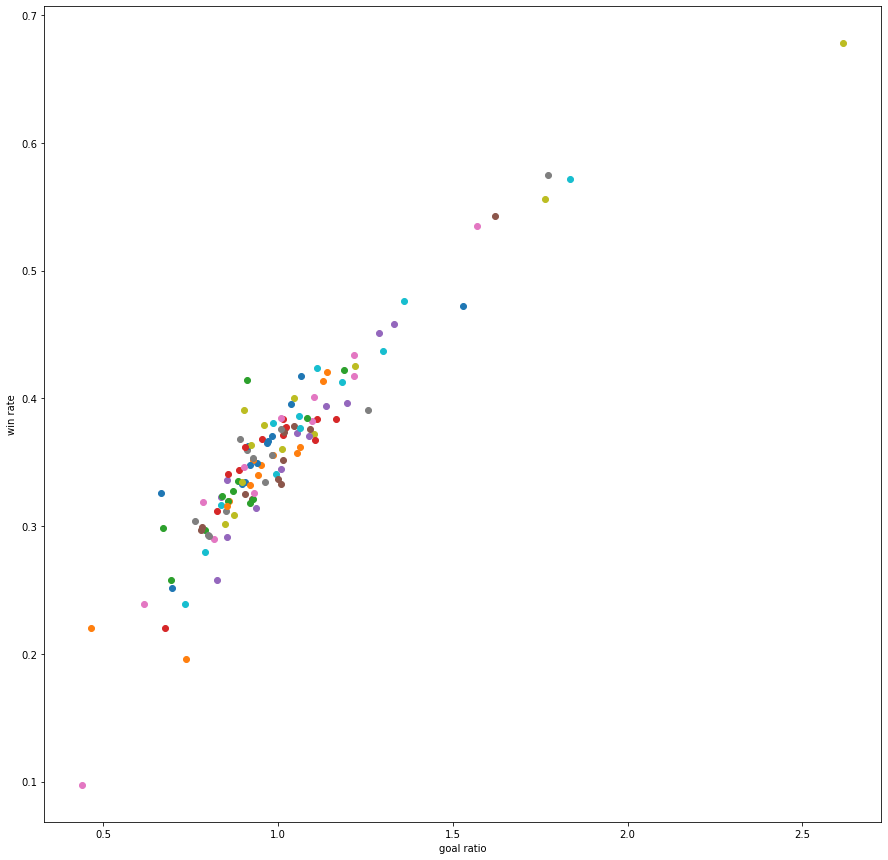

In [14]:
fig= plt.figure(figsize=(15,15))
for idx, row in team_filtered.iterrows():
    plt.scatter(row['goal_ratio'], row['winrate'])

plt.xlabel('goal ratio')
plt.ylabel('win rate')
plt.show()

### From the graph, it is evident that they have an approximately linear relationship. Now, we plot the same graph with a fitted line. We can also print out the coefficient and the intercept of the fitted line. The null hypothesis (i.e., no correlation) is rejected.

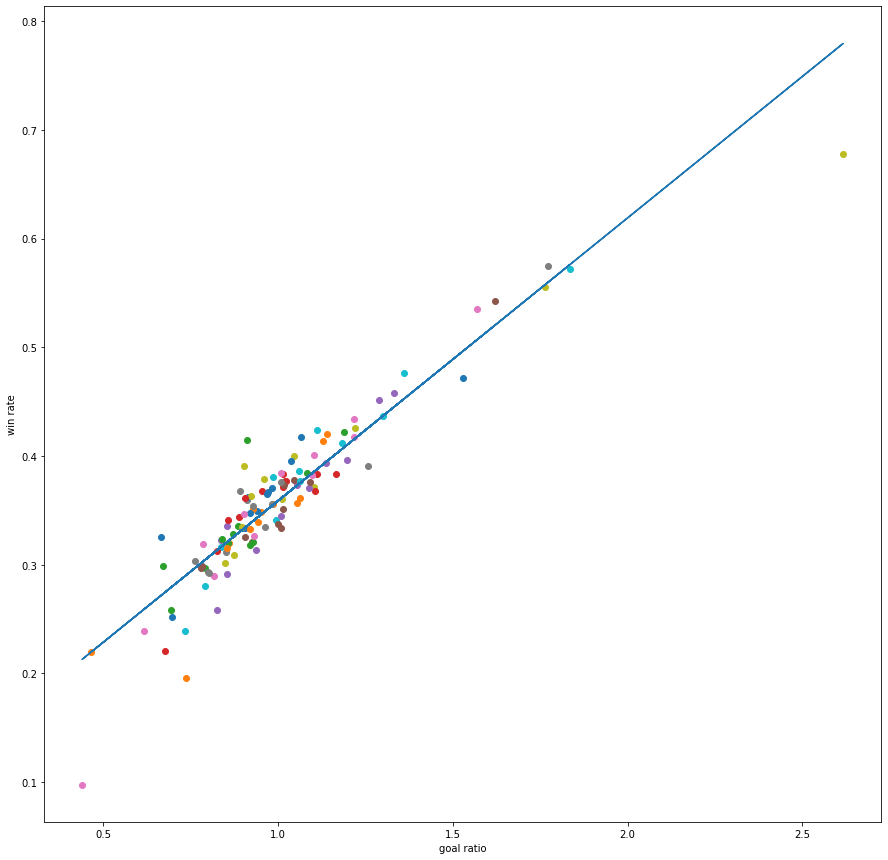

The intercept is 0.09849898607609475
The coefficient is 0.2602514809999917


In [15]:
fig= plt.figure(figsize=(15,15))
for idx, row in team_filtered.iterrows():
    plt.scatter(row['goal_ratio'], row['winrate'])
x = team_filtered['goal_ratio']
y = team_filtered['winrate']
rl = []
# calculating params for the line
m, b = np.polyfit(x, y, 1)
for i in x:
    val = b + m * i
    rl.append(val)
plt.plot(x, rl) # plot the fitted line
plt.xlabel('goal ratio')
plt.ylabel('win rate')
plt.show()
print('The intercept is ' + str(b))
print('The coefficient is ' + str(m))

### The intercept tells us that when the $goal\:ratio$ for a team is $0$ (i.e., no goal), the $win\:rate$ is less than $10\%$; the coefficient tells us that for a unit increase in the $goal\:ratio$, there is a $0.26$ unit increase in $win\:rate$. 
### Another way to visualize the data is using a histogram. We can use 50 buckets to see the distribution of the $goal\:ratio$.

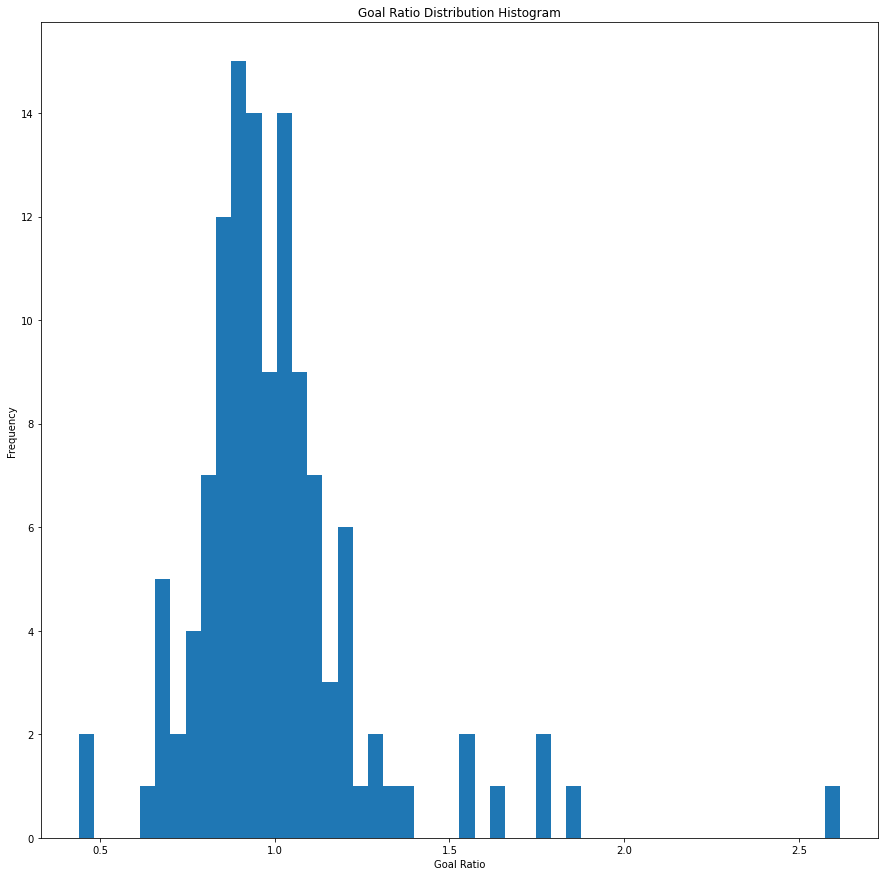

In [16]:
# plot a histogram
fig= plt.figure(figsize=(15,15))
x = team_filtered['goal_ratio'].to_numpy()
plt.hist(x, bins=50) # using 50 buckets
plt.gca().set(title='Goal Ratio Distribution Histogram', xlabel='Goal Ratio', ylabel='Frequency');
plt.show()

### We see that most of the team have a $goal\:ratio \approx 1$. In Premier League where $20$ teams compete, the bottom $3$ teams are relegated. In a hypothetical Premier League with $122$ teams, a teams needs to stay away from the bottom $122 \times \frac{3}{20} \approx 19$ position to avoid being relegated. Let's do some slicing:

In [17]:
team = team_filtered.sort_values('goal_ratio')
slice = team[18:20]
slice

,games,wins,losses,winrate,goals,draws,opponent_goals,goal_ratio
team,,,,,,,,
Morecambe FC,362,105,157,0.290055,436,100,533,0.818011
Scunthorpe United FC,362,113,146,0.312155,437,103,530,0.824528


### That is, in order to avoid being relegated, the hypothetical team only needs <br /> <center> $goal\:ratio \approx 0.82$ </center> <br /> and <br /> <center> $win\:rate \approx 30\%$ </center>

### Next, we will predict the performance of randomly selected teams.
## Predict the Performance Using Linear Regression
### The first step for predicting is split the data intro training and test set. We select the first $99$ rows as our training data so that <br /> <center>$training\:set:test\:set \approx 4:1$</center>

In [18]:
# split to training and test set
train = team_filtered.iloc[:99,:]
test = team_filtered.iloc[100:,:]

### We then convert the data into numpy arrays for calculation purposes and use the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from scikit-learn. We print out the coefficient and intercept. They are almost identical to the result we got from numpy's $polyfit()$ function.

In [19]:
train_X = train['goal_ratio'].to_numpy()
train_y = train['winrate'].to_numpy()
train_X = np.array([[h] for h in train_X])
reg = linear_model.LinearRegression().fit(train_X, train_y)
print('The coefficient is ' + str(reg.coef_[0]))
print('The intercept is ' + str(reg.intercept_))

The coefficient is 0.25205978278244273
The intercept is 0.10698243379116967


### We can judge the quality of the fit using scikit-learn's $score()$ function. The score is not perfect but definitely not low either.

In [20]:
# judge the quality of the fit
test_X = test['goal_ratio'].to_numpy()
test_y = test['winrate'].to_numpy()
test_X = np.array([[h] for h in test_X])
reg.score(test_X, test_y)

0.7623100437481832

### However, the score does not give a direct feeling of the accuracy of our prediction. We can use visualization to help us by comparing the actual result and the predicted result on the same graph.

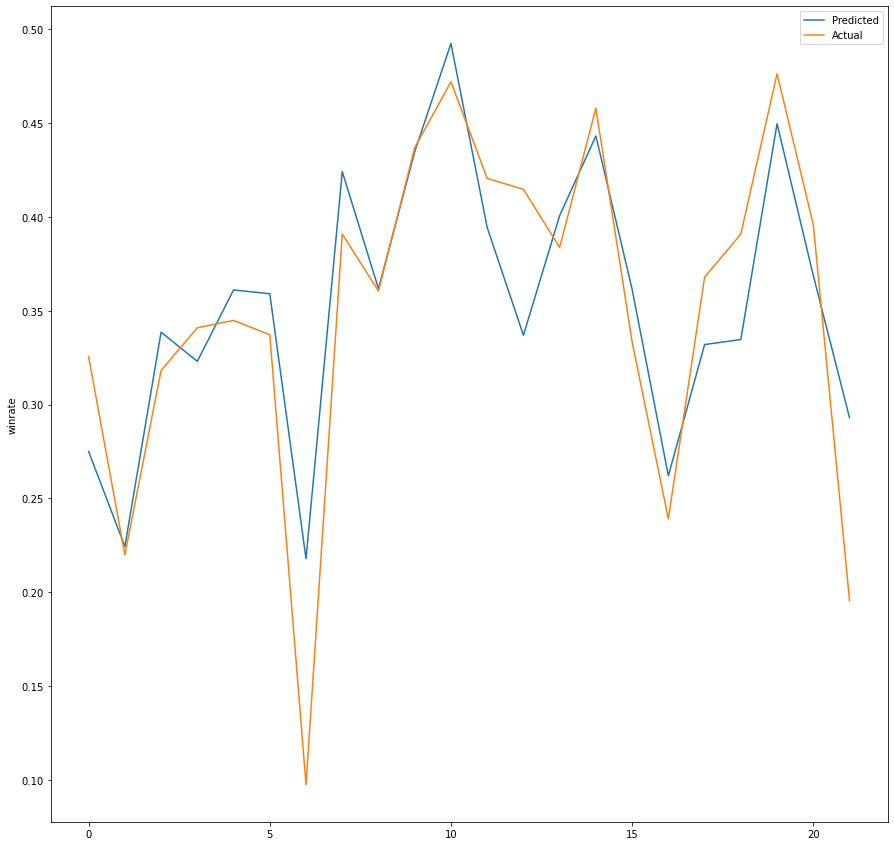

In [21]:
predicted = reg.predict(test_X) # getting the predicted result
fig= plt.figure(figsize=(15,15))
# plot the results
plt.plot(predicted, label='Predicted')
plt.plot(test_y, label='Actual')
plt.ylabel('winrate')
plt.legend()
plt.show()

### Actually, we find that our prediction is, to a great extent, accurate! 
## Conclusion
### In this tutorial, we find out some interesting pattern about the $win\:rate$ and the $goal\:ratio$: $win\:rate$ of a team is linearly proportional to its $goal\:ratio$. We find out that the gap between different football clubs has incrased dramatically over the years. We also use linear regression to model the $win\:rate$ of a few football clubs and get decent results. This allows us to approximate the $win\:rate$ of any team with a high accuracy observing its $goal\:ratio$. If more detailed data is available, we can perhaps look into how players are affecting the team's $win\:rate$, and thus calculate their relative cost efficiency.